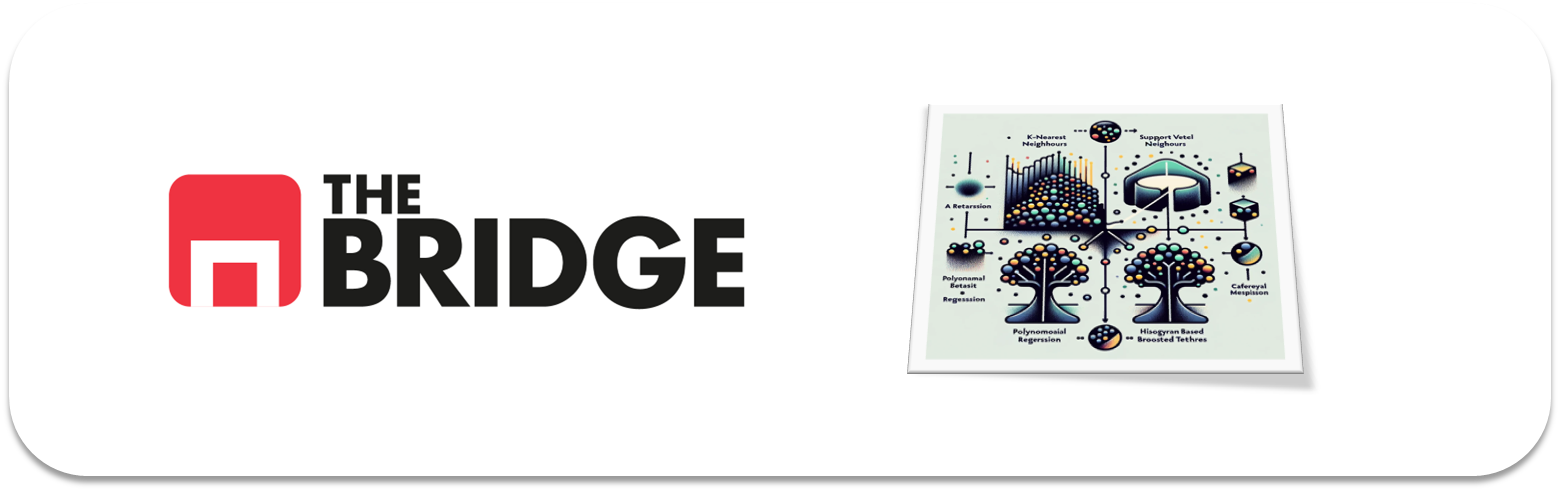

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.neighbors import KNeighborsRegressor 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df=pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30-59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime60-89dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [4]:
df.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   seriousdlqin2yrs                      12537 non-null  int64  
 1   revolvingutilizationofunsecuredlines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   numberoftime30-59dayspastduenotworse  12537 non-null  int64  
 4   debtratio                             12537 non-null  float64
 5   monthlyincome                         11816 non-null  float64
 6   numberofopencreditlinesandloans       12537 non-null  int64  
 7   numberoftimes90dayslate               12537 non-null  int64  
 8   numberrealestateloansorlines          12537 non-null  int64  
 9   numberoftime60-89dayspastduenotworse  12537 non-null  int64  
 10  numberofdependents                    12360 non-null  float64
dtypes: float64(4), 

| Columna                                             | Descripción                                             | Tipo               |
|-----------------------------------------------------|---------------------------------------------------------|--------------------|
| seriousdlqin2yrs                                    | Si la persona ha tenido incumplimiento grave de pago.    | Binario            |
| revolvingutilizationofunsecuredlines                | Porcentaje de crédito utilizado de líneas no aseguradas. | Numérica continua  |
| age                                                 | Edad del solicitante.                                   | Numérica entera    |
| numberoftime30-59dayspastduenotworse                | Número de veces retrasado entre 30 y 59 días, sin mayores retrasos. | Numérica discreta  |
| debtratio                                           | Relación entre deuda total e ingreso mensual.           | Numérica continua  |
| monthlyincome                                       | Ingreso mensual del solicitante.                        | Numérica continua  |
| numberofopencreditlinesandloans                    | Número de líneas de crédito abiertas y préstamos.       | Numérica discreta  |
| numberoftimes90dayslate                             | Número de veces retrasado 90 días o más en el pago.     | Numérica discreta  |
| numberrealestateloansorlines                        | Número de préstamos o líneas de crédito de bienes raíces. | Numérica discreta  |
| numberoftime60-89dayspastduenotworse                | Número de veces retrasado entre 60 y 89 días, sin mayores retrasos. | Numérica discreta  |
| numberofdependents                                  | Número de personas dependientes del solicitante.                 | Numérica discreta  |

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando con un problema de clasificación binaria. El objetivo es predecir si una persona tendrá dificultades financieras en los próximos dos años, y la variable target es la columna **seriousdlqin2yrs**, que indica si la persona ha tenido un incumplimiento grave de pago (sí o no, representado como 1 o 0).

Este tipo de problema se caracteriza por intentar clasificar a las personas en dos categorías:

* 1: Si se espera que tengan dificultades financieras en los próximos dos años (incumplimiento grave de pago).
* 0: Si no se espera que tengan dificultades financieras en ese período.

Por tanto, es un modelo de clasificación binaria,y usaremos otras columnas (como ingreso mensual, edad, número de dependientes, etc.) como características para predecir si la persona caerá en la categoría de incumplimiento o no.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [6]:
target=["seriousdlqin2yrs"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_50900\3051520651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seriousdlqin2yrs', data=df, palette='Blues')


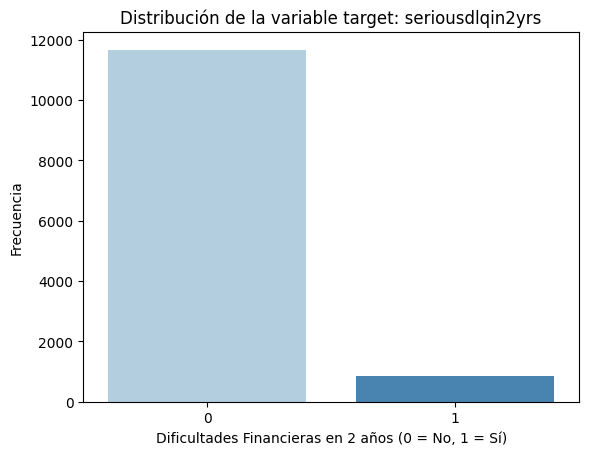

In [7]:
sns.countplot(x='seriousdlqin2yrs', data=df, palette='Blues')

# Título y etiquetas
plt.title('Distribución de la variable target: seriousdlqin2yrs')
plt.xlabel('Dificultades Financieras en 2 años (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

### Limpieza y separacion

Eliminación de nulos: En “number of dependents” hemos sustituido los valores nulos por 0 y en “monthly income” hemos sustituido los nulos por la media de la variable.


In [8]:
# Imputar "Number of Dependents" con 0
df['numberofdependents'].fillna(0, inplace=True)

# Imputar "Monthly Income" con la mediana
median_income = df['monthlyincome'].median()
df['monthlyincome'].fillna(median_income, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_50900\1307625685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numberofdependents'].fillna(0, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_50900\1307625685.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Separación en train y test: Ahora vamos a separar en conjuntos de entrenamiento (train) y de prueba (test), dividiendo los datos de manera que el 80% se use para entrenamiento y el 20% restante para pruebas.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [10]:



X = df.drop(columns=["seriousdlqin2yrs"])  # Las características
y = df["seriousdlqin2yrs"]  # El target

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   seriousdlqin2yrs                      12537 non-null  int64  
 1   revolvingutilizationofunsecuredlines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   numberoftime30-59dayspastduenotworse  12537 non-null  int64  
 4   debtratio                             12537 non-null  float64
 5   monthlyincome                         12537 non-null  float64
 6   numberofopencreditlinesandloans       12537 non-null  int64  
 7   numberoftimes90dayslate               12537 non-null  int64  
 8   numberrealestateloansorlines          12537 non-null  int64  
 9   numberoftime60-89dayspastduenotworse  12537 non-null  int64  
 10  numberofdependents                    12537 non-null  float64
dtypes: float64(4), 

### Correlación y selección de características:
Ahora vamos a usar las correlaciones y fijaremos un criterio de 0.17 para saber con cuáles variables nos quedamos, eliminando aquellas que tengan correlaciones demasiado altas.

In [12]:
# Correlación de Pearson entre las variables numéricas y el target binario
correlation = df.corr()['seriousdlqin2yrs'].abs().sort_values(ascending=False)
print(correlation)

seriousdlqin2yrs                        1.000000
revolvingutilizationofunsecuredlines    0.281900
age                                     0.116908
numberoftimes90dayslate                 0.116649
numberoftime30-59dayspastduenotworse    0.115229
numberoftime60-89dayspastduenotworse    0.094080
numberofdependents                      0.046903
numberofopencreditlinesandloans         0.029063
monthlyincome                           0.021111
debtratio                               0.017445
numberrealestateloansorlines            0.005743
Name: seriousdlqin2yrs, dtype: float64


In [13]:
criterio = 0.017

# Fijamos un criterio para seleccionar nuestras features numéricas

features_num =correlation[correlation > criterio].index.to_list()

<Axes: >

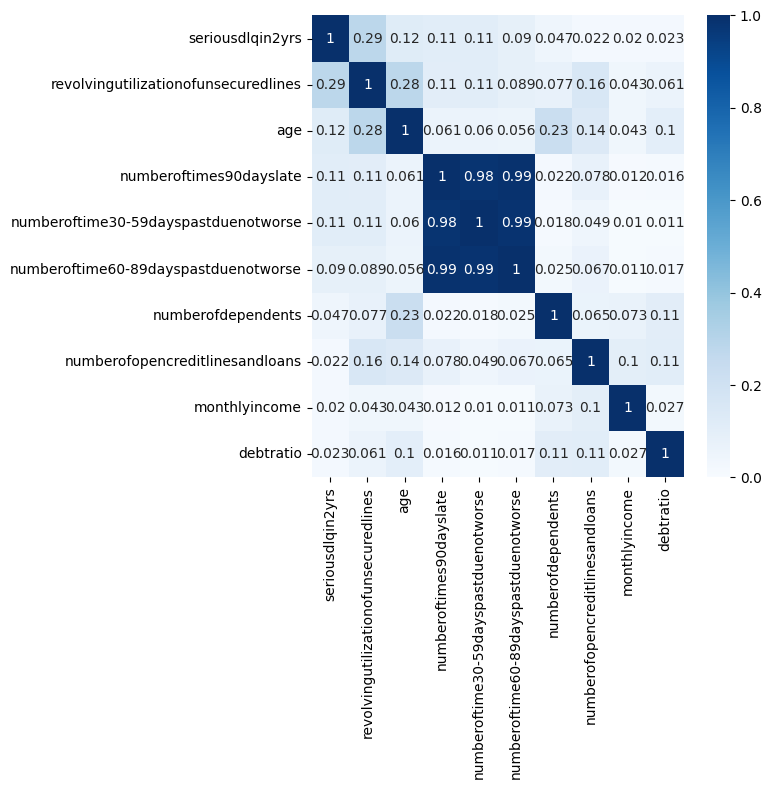

In [14]:
plt.figure(figsize = (6,6))
sns.heatmap(np.abs(train_set[features_num].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1)

Eliminación de variables colineales: Hemos eliminado las variables “numberOfTimes60-89daysLate” y “numberOfTimes90DaysLate” debido a su alta correlación entre ellas y con el target, y pasamos a hacer un histograma de las demás variables numéricas para revisar su distribución.

In [15]:
df = df.drop(columns=["numberoftime60-89dayspastduenotworse"]) # elimino esta variable por exceso de correlacion para no tener luego problemas con el modelo

In [16]:
df = df.drop(columns=["numberoftimes90dayslate"])# elimino esta variable por exceso de correlacion para no tener luego problemas con el modelo


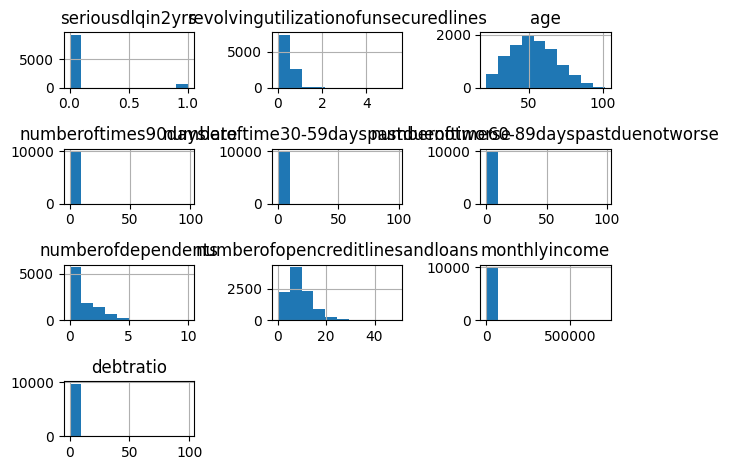

In [17]:
train_set[features_num].hist()
plt.tight_layout()

### Estandarización y transformación: 

Ahora hemos estandarizado la variable “age” porque los modelos son muy sensibles a la estandarización, y hemos aplicado la transformación logarítmica a otras variables debido a sus distribuciones sesgadas

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Primero, seleccionamos las columnas numéricas que necesitan transformación
numerical_features = df.drop(columns=['seriousdlqin2yrs'])

# Transformación logarítmica (agregar 1 a las variables con sesgo hacia 0 antes de aplicar log)
log_transformed_columns = ['revolvingutilizationofunsecuredlines', 
                           'debtratio',
                           'numberofopencreditlinesandloans',
                           'numberofdependents',
                           'monthlyincome']
df[log_transformed_columns] = df[log_transformed_columns].apply(lambda x: np.log1p(x))

# Estandarización de la columna 'age' (o cualquier otra variable que lo necesite)
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

# Comprobamos si las transformaciones se aplicaron correctamente
df[log_transformed_columns + ['age']].describe()

,revolvingutilizationofunsecuredlines,debtratio,numberofopencreditlinesandloans,numberofdependents,monthlyincome,age
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,1.253700e+04
mean,0.251928,0.411191,2.086634,0.434243,8.535899,2.006318e-16
std,0.251492,0.674115,0.613221,0.538350,0.860912,1.000040e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.061395e+00
25%,0.030190,0.133015,1.791759,0.000000,8.174985,-7.348624e-01
50%,0.151424,0.263921,2.197225,0.000000,8.597297,-7.159596e-02
75%,0.458828,0.409938,2.484907,0.693147,8.991438,6.579971e-01
max,1.945910,4.605170,3.912023,2.397895,13.462402,3.244736e+00


### Entrenamiento de modelos: 
Ahora vamos a hacer consecutivamente el entrenamiento de los tres modelos: KNN, SVM y regresión polinómica, para ver cuál da mejores resultados en términos de precisión y recall.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred_knn = knn.predict(X_test)

# Evaluar el rendimiento
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.33      0.02      0.05       163

    accuracy                           0.93      2508
   macro avg       0.63      0.51      0.51      2508
weighted avg       0.90      0.93      0.91      2508



C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm = SVC()

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred_svm = svm.predict(X_test)

# Evaluar el rendimiento
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.00      0.00      0.00       163

    accuracy                           0.94      2508
   macro avg       0.47      0.50      0.48      2508
weighted avg       0.87      0.94      0.90      2508



C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Transformar las características para incluir términos polinómicos
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train_poly, y_train)

# Hacer predicciones
y_pred_poly = log_reg.predict(X_test_poly)

# Evaluar el rendimiento
print("Polynomial Regression Classification Report:")
print(classification_report(y_test, y_pred_poly))

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Polynomial Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.50      0.01      0.01       163

    accuracy                           0.94      2508
   macro avg       0.72      0.50      0.49      2508
weighted avg       0.91      0.94      0.90      2508



C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score

# Evaluación de la precisión de cada modelo
knn_acc = accuracy_score(y_test, y_pred_knn)
svm_acc = accuracy_score(y_test, y_pred_svm)
poly_acc = accuracy_score(y_test, y_pred_poly)

print(f"KNN Accuracy: {knn_acc}")
print(f"SVM Accuracy: {svm_acc}")
print(f"Polynomial Regression Accuracy: {poly_acc}")

KNN Accuracy: 0.9334130781499203
SVM Accuracy: 0.9350079744816587
Polynomial Regression Accuracy: 0.9350079744816587


In [23]:
from sklearn.model_selection import cross_val_score

# Evaluación con validación cruzada
knn_cv = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
svm_cv = cross_val_score(svm, X, y, cv=5, scoring="accuracy")
log_reg_cv = cross_val_score(log_reg, X_train_poly, y_train, cv=5, scoring="accuracy")

print(f"KNN Cross Validation Score: {knn_cv.mean()}")
print(f"SVM Cross Validation Score: {svm_cv.mean()}")
print(f"Polynomial Regression Cross Validation Score: {log_reg_cv.mean()}")

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was pa

KNN Cross Validation Score: 0.9280533485506929
SVM Cross Validation Score: 0.9310840014784759
Polynomial Regression Cross Validation Score: 0.9296042048418336


C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ajuste de hiperparámetros con RandomizedSearchCV:

Como hemos podido observar, los modelos tienen un rendimiento similar, pero como nos dice el negocio, tenemos que incidir más en el recall. Por ello, vamos a hacer un ajuste de hiperparámetros con RandomizedSearchCV en el mejor modelo, que hemos seleccionado, el SVM.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline


# Definir el modelo SVM
svm = SVC(random_state=42)

# Definir el rango de hiperparámetros a explorar
param_dist = {
    'svc__C': np.logspace(-3, 3, 7),  # Rango de C entre 0.001 y 1000
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4],  # Solo relevante para el kernel polinómico
}

# Crear una pipeline que primero estandariza los datos y luego aplica el SVM
pipeline = make_pipeline(StandardScaler(), svm)

# Usar RandomizedSearchCV para ajustar los hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=3, n_jobs=-1, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
print("Mejores parámetros encontrados: ", random_search.best_params_)

# Evaluar el modelo ajustado
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener probabilidades de clase
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Queria utilizar la curva roc para ver como se comportaban los modelos y el AUC por que es muy desbalenaceado

In [ ]:
errors = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
errors['Error'] = errors['True Label'] != errors['Predicted Label']
false_positives = errors[(errors['True Label'] == 0) & (errors['Predicted Label'] == 1)]
false_negatives = errors[(errors['True Label'] == 1) & (errors['Predicted Label'] == 0)]


Esto era para representar los falso positivos y los falsos negativos para hacerse una idea de como era el recall en general.